In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import hvplot.xarray # noqa
import panel.widgets as pnw
import panel as pn
from bokeh.resources import INLINE

file1 = r'F:\SpaFHy_2D_2021/testcase_input_202305051600.nc' # twi_cutoff = 97.5 ; m = 0.025
file1 = r'F:\SpaFHy_2D_2021/testcase_input_202305090927.nc' # twi_cutoff = 97.5 ; m = 0.025

file2 = r'F:\SpaFHy_2D_2021/testcase_input_202304131809.nc' # twi_cutoff = 95.5 ; m = 0.01
file2 = r'F:\SpaFHy_2D_2021/testcase_input_202305090931.nc' # twi_cutoff = 95.5 ; m = 0.01

file3 = r'F:\SpaFHy_2D_2021/testcase_input_202305051544.nc' # twi_cutoff = 97.5 ; m = 0.005
file3 = r'F:\SpaFHy_2D_2021/testcase_input_202305090933.nc' # twi_cutoff = 97.5 ; m = 0.005


d1 = xr.open_dataset(file1)
d2 = xr.open_dataset(file2)
d3 = xr.open_dataset(file3)

In [12]:
im1 = d1['bucket_moisture_root'].hvplot.image(width=450,height=400,cmap='bwr_r', clim=(0.09,0.88))
im2 = d2['bucket_moisture_root'].hvplot.image(width=450,height=400, cmap='bwr_r', clim=(0.09,0.88))
im3 = d3['bucket_moisture_root'].hvplot.image(width=450,height=400, cmap='bwr_r', clim=(0.09,0.88))

im1 + im2 + im3

:Layout
   .DynamicMap.I   :DynamicMap   [time]
      :Image   [lon,lat]   (bucket_moisture_root)
   .DynamicMap.II  :DynamicMap   [time]
      :Image   [lon,lat]   (bucket_moisture_root)
   .DynamicMap.III :DynamicMap   [time]
      :Image   [lon,lat]   (bucket_moisture_root)

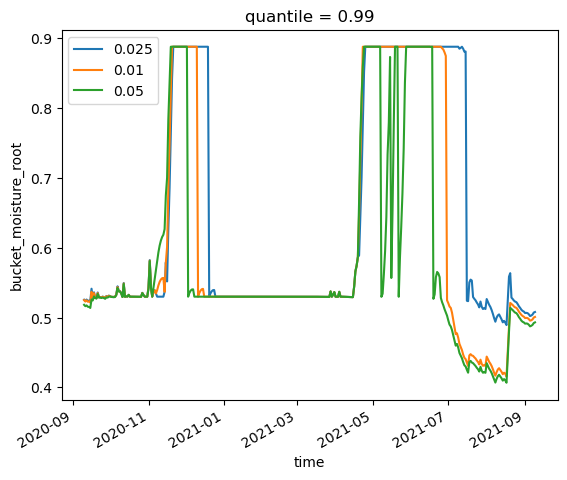

In [58]:
q = 0.99
d1['bucket_moisture_root'].quantile(q, dim=['lat', 'lon']).plot(label='0.025')
d2['bucket_moisture_root'].quantile(q, dim=['lat', 'lon']).plot(label='0.01')
d3['bucket_moisture_root'].quantile(q, dim=['lat', 'lon']).plot(label='0.05')
plt.legend()

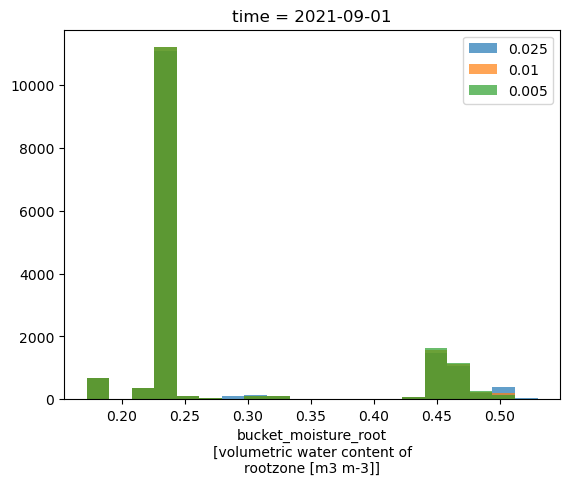

In [56]:
time = '2021-09-01'
d1['bucket_moisture_root'].sel(time=time).plot.hist(alpha=0.7, bins=20, label='0.025')
d2['bucket_moisture_root'].sel(time=time).plot.hist(alpha=0.7, bins=20, label='0.01')
d3['bucket_moisture_root'].sel(time=time).plot.hist(alpha=0.7, bins=20, label='0.005')
plt.legend()

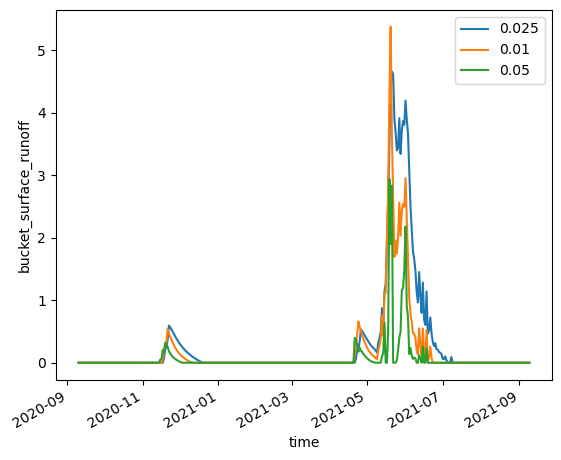

In [15]:
d1['bucket_surface_runoff'].mean(dim=['lat', 'lon']).plot(label='0.025')
d2['bucket_surface_runoff'].mean(dim=['lat', 'lon']).plot(label='0.01')
d3['bucket_surface_runoff'].mean(dim=['lat', 'lon']).plot(label='0.05')
plt.legend()

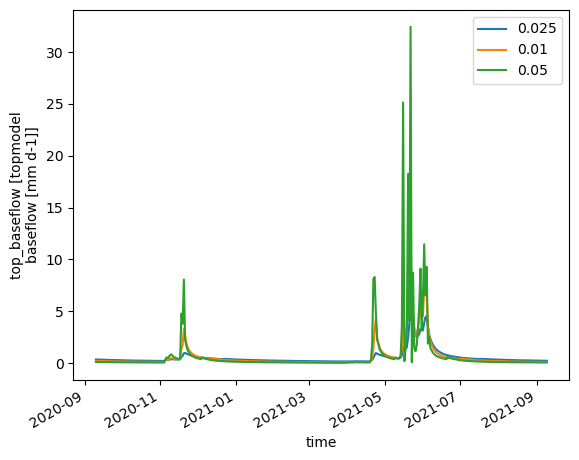

In [17]:
d1['top_baseflow'].plot(label='0.025')
d2['top_baseflow'].plot(label='0.01')
d3['top_baseflow'].plot(label='0.05')
plt.legend()

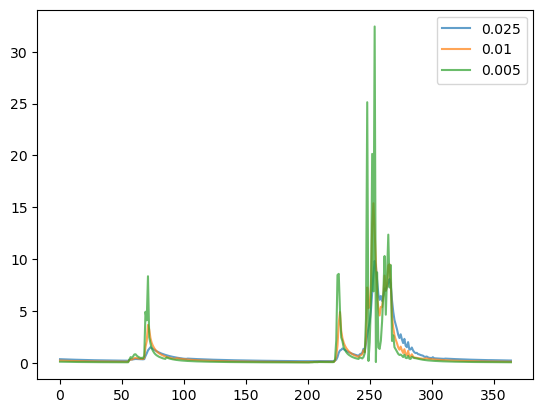

In [32]:
plt.plot((np.array(d1['bucket_surface_runoff'].mean(dim=['lat', 'lon']))+np.array(d1['top_baseflow'])),alpha=0.7, label='0.025')
plt.plot((np.array(d2['bucket_surface_runoff'].mean(dim=['lat', 'lon']))+np.array(d2['top_baseflow'])),alpha=0.7, label='0.01')
plt.plot((np.array(d3['bucket_surface_runoff'].mean(dim=['lat', 'lon']))+np.array(d3['top_baseflow'])),alpha=0.7, label='0.005')
plt.legend()